
# Random Forest

The purpose of this is to review Python syntax by fitting
a random forest on simulated data.

In [36]:
import numpy as np
import pandas as pd
import graphviz
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## 2-dimensions

#### Data Generating Process: 2-dim

In [136]:
X, y = make_blobs(n_samples=1111, centers=4, n_features=2,
                  random_state=0, cluster_std=1.5)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

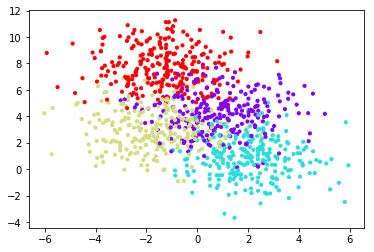

In [138]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, s=10, cmap='rainbow')
plt.show()

#### ScikitLearn - Decision Tree (Overfit)

In [139]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

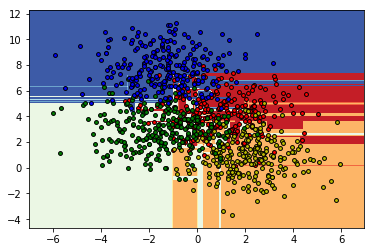

In [141]:
# Parameters
n_classes = 4
plot_colors = "rygb"
plot_step = 0.02

# We only take the two corresponding features
X = X_train
y = y_train

# Train
clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.show()
    

In [142]:
sum(model.predict(X_test) == y_test) / y_test.size

0.6964285714285714

#### ScikitLearn - Random Forest

In [145]:
model = RF(n_estimators=100, max_depth=2, random_state=0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [146]:
sum(model.predict(X_test) == y_test) / y_test.size

0.7678571428571429

In [147]:
model.feature_importances_

array([ 0.41542931,  0.58457069])

## 20-dimensions

#### Data Generating Process

In [155]:
X, y = make_blobs(n_samples=1111, centers=4, n_features=20,
                  random_state=0, cluster_std=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#### ScikitLearn - Decision Tree (Overfit)

In [156]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
sum(model.predict(X_test) == y_test) / y_test.size

0.625

#### ScikitLearn - Random Forest

In [158]:
model = RF(n_estimators=100, max_depth=2, random_state=0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [159]:
sum(model.predict(X_test) == y_test) / y_test.size

0.75

In [160]:
model.feature_importances_

array([ 0.09991018,  0.01367462,  0.        ,  0.04337462,  0.02319888,
        0.00386407,  0.0854579 ,  0.18764504,  0.01967494,  0.        ,
        0.05966631,  0.00128606,  0.00762854,  0.09195181,  0.10860079,
        0.04434919,  0.03604892,  0.04451003,  0.03487549,  0.09428262])